In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:

from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet=gc.open('DL1').sheet1
data1=worksheet.get_all_values()

In [ ]:
dataset1=pd.DataFrame(data1[1:],columns=data1[0])
dataset1=dataset1.astype({'x123':'float'})
dataset1=dataset1.astype({'y123':'float'})

In [ ]:
data=pd.read_csv("DL1 - Sheet1.csv")

In [ ]:
data.head().astype(float)


,x123,y123
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
X12=data[['x123']].values
y12=data[['y123']].values

NameError: name 'data' is not defined

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X12,y12,test_size=0.33,random_state=43)

In [ ]:
print("Shape of x_train1:",x_train1.shape)
print("Shape of y_train:", y_train1.shape)

Shape of x_train1: (13, 1)
Shape of y_train: (13, 1)


In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(x_train1)

MinMaxScaler()

In [ ]:
x_train1=scaler.transform(x_train1)

In [ ]:
ai_model=Sequential([
    Dense(8,activation='relu',input_shape=[1]),
    Dense(10,activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ai_model.compile(optimizer='rmsprop',loss='mse')

In [17]:
ai_model.fit(x_train1,y_train1,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 782.5901
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 781.2614
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 779.9330
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 778.6058
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 777.2789
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 775.9527
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 774.6268
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 773.3022
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 771.9776
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 770.6540
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 769.3311
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 768.0089
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 766.6873
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 765.3663
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3

<Axes: >

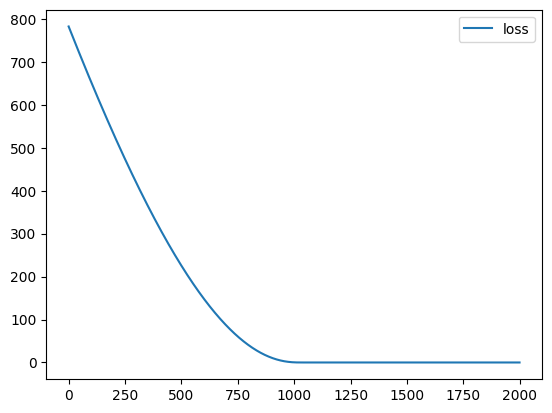

In [18]:
loss_df=pd.DataFrame(ai_model.history.history)
loss_df.plot()

In [19]:
x_test1=scaler.transform(x_test1)

In [20]:
ai_model.evaluate(x_test1,y_test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0094


0.00944875180721283

In [24]:
x_n1=[[6]]

In [25]:
x_n1_1=scaler.transform(x_n1)

In [26]:
ai_model.predict(x_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[60.937374]], dtype=float32)